In [1]:
import numpy as np
%matplotlib inline

In [2]:
class Perceptron(object):
    """
    Perceptron classifier.
    
    Parameters
    --------------
    eta : float
         Learning rate (between 0.0 and 1.0)
    n_iter : int
         Passes over the training dataset.
    
    Attributes
    --------------
    w_ : 1D-array
         Weights after fitting.
    errors_ : list
         Number of misclassificaions in every epoch
         
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        Fit training data.

        Parameters
        -----------
        X : {array-like}, shape = {n_samples, n_features}
            Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -----------
        self : object

        """

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """
        Calculate net input.
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """
        Return class label after unit step.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
y = df.iloc[0:100, 4].values

In [6]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [7]:
X = df.iloc[0:100, [0, 2]].values

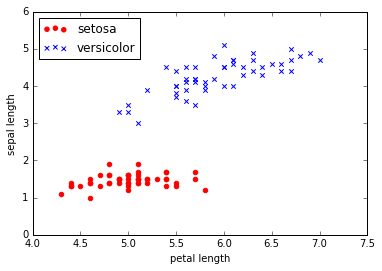

In [8]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
#Places a legend on the axes
plt.legend(loc='upper left')
plt.show()

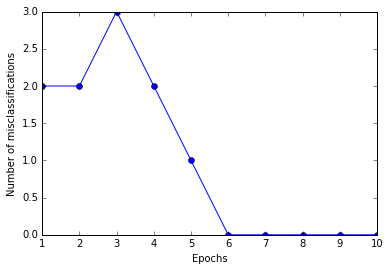

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [10]:
from matplotlib.colors import ListedColormap

In [11]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    #ListedColormap: Make a colormap from a list of colors.
    #numpy.unique: Find the unique elements of an array,Returns the sorted unique elements of an array
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    
    #numpy.meshgrid: Return coordinate matrices from coordinate vectors.
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

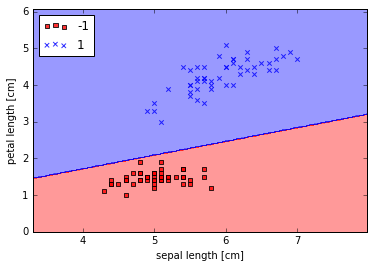

In [12]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

为了容易理解上图的绘制过程，下面将plot_decision_regions函数拆开，如下：

<font color=red>首先绘制分类器图表的边界，这里使用用meshgrid函数计算出的坐标矩阵，并由ListedColormap设置的cmap颜色。</font>

In [13]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#ListedColormap: Make a colormap from a list of colors.
#numpy.unique: Find the unique elements of an array,Returns the sorted unique elements of an array
#np.unique(y)为[-1， 1]，ListedColormap将-1映射成red，将1映射成blue。
cmap = ListedColormap(colors[:len(np.unique(y))])

In [14]:
#plot the decision surface
#设置X1和X2的边界值
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [15]:
#numpy.meshgrid: Return coordinate matrices from coordinate vectors.
#使用meshgrid函数计算坐标向量矩阵
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

In [16]:
xx1

array([[ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       ..., 
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98]])

In [17]:
xx2

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.02,  0.02,  0.02, ...,  0.02,  0.02,  0.02],
       [ 0.04,  0.04,  0.04, ...,  0.04,  0.04,  0.04],
       ..., 
       [ 6.04,  6.04,  6.04, ...,  6.04,  6.04,  6.04],
       [ 6.06,  6.06,  6.06, ...,  6.06,  6.06,  6.06],
       [ 6.08,  6.08,  6.08, ...,  6.08,  6.08,  6.08]])

In [18]:
Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

In [20]:
Z

array([-1, -1, -1, ...,  1,  1,  1])

In [21]:
len(Z)

71675

In [22]:
len(xx1)

305

In [23]:
len(xx2)

305

In [24]:
xx1.shape

(305, 235)

In [25]:
Z = Z.reshape(xx1.shape)

In [26]:
Z

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ..., 
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]])

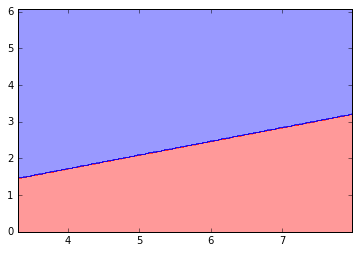

In [27]:
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

In [28]:
np.array([xx1.ravel(), xx2.ravel()])

array([[ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 0.  ,  0.  ,  0.  , ...,  6.08,  6.08,  6.08]])

In [29]:
np.array([xx1.ravel(), xx2.ravel()]).T

array([[ 3.3 ,  0.  ],
       [ 3.32,  0.  ],
       [ 3.34,  0.  ],
       ..., 
       [ 7.94,  6.08],
       [ 7.96,  6.08],
       [ 7.98,  6.08]])

<font color=red>最后绘制感知机图表中的数据点，并设置cmap颜色以及图表标题。以下是具体代码和图表。</font>

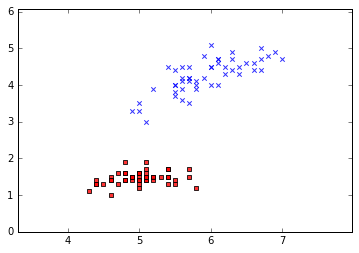

In [30]:
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
# plot class samples
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

## Implementing an Adaptive Linear Neuron in Python

In [41]:
class AdalineGD(object):
    """
    Adaptive Linear Neuron classifier.

    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1D-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """

    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        Fit training data.

        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Trainging vectors,
            where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            #w0,w1,w2
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            print(i,self.w_)
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """
        Calculate net input.
        
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """
        Compute linear activation.
        
        """
        return self.net_input(X)
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

0 [ 0.     0.465  1.398]
1 [ -6.545091  -36.1128963 -19.1878272]
2 [  252.4892171   1410.59533177   790.4242396 ]
3 [ -9979.56123384 -55734.44914837 -31188.85693652]
4 [  394185.67984303  2201491.42665656  1231990.78283011]
5 [-15570317.21569783 -86958795.08860908 -48663529.13845024]
6 [  6.15026588e+08   3.43486717e+09   1.92220651e+09]
7 [ -2.42935133e+10  -1.35677047e+11  -7.59270417e+10]
8 [  9.59592317e+11   5.35923520e+12   2.99911359e+12]
9 [ -3.79038389e+13  -2.11689469e+14  -1.18464807e+14]
0 [  0.00000000e+00   4.65000000e-05   1.39800000e-04]
1 [ -6.54509100e-08   9.26295710e-05   2.79380162e-04]
2 [ -1.96080606e-07   1.38390233e-04   4.18741337e-04]
3 [ -3.91618065e-07   1.83783501e-04   5.57884376e-04]
4 [ -6.51793365e-07   2.28810883e-04   6.96810122e-04]
5 [ -9.76337677e-07   2.73473880e-04   8.35519418e-04]
6 [ -1.36498326e-06   3.17773988e-04   9.74013102e-04]
7 [ -1.81746346e-06   3.61712698e-04   1.11229201e-03]
8 [ -2.33351270e-06   4.05291492e-04   1.25035697e-03]


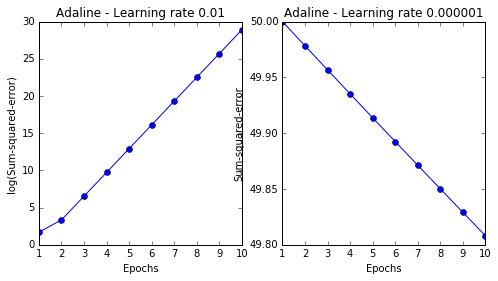

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.000001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.000001')
plt.show()

In [61]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

0 [ 0.          0.72829015  0.96995527]
1 [  1.47437618e-15  -5.96910515e-02   3.78300208e-01]
2 [  3.55271368e-17   4.20963140e-01   1.01844764e+00]
3 [  1.05027098e-15  -9.90857271e-02   6.27969356e-01]
4 [  1.21014310e-16   2.18134617e-01   1.05045145e+00]
5 [  6.56141808e-16  -1.25085277e-01   7.92745060e-01]
6 [  1.01030295e-16   8.42726120e-02   1.07157320e+00]
7 [  5.87307980e-16  -1.42244362e-01   9.01493109e-01]
8 [  1.58761893e-16  -4.07313022e-03   1.08551306e+00]
9 [  3.40838469e-16  -1.53568950e-01   9.73264237e-01]
10 [  1.11022302e-16  -6.23792207e-02   1.09471303e+00]
11 [  2.56461519e-16  -1.61042909e-01   1.02063148e+00]
12 [  1.67643677e-16  -1.00859855e-01   1.10078479e+00]
13 [  2.29816166e-16  -1.65975545e-01   1.05189273e+00]
14 [  1.59872116e-16  -1.26256159e-01   1.10479201e+00]


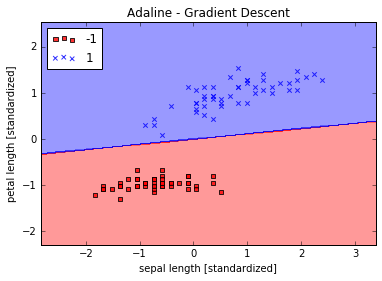

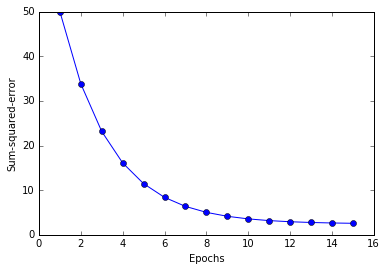

In [62]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()